# Lab 3

#### Joseph Bu

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

## Problem 1

### A) So our goal is to identify bad data and throw it out.

#### 1. Start by exploring the data you have created with appropriate plots

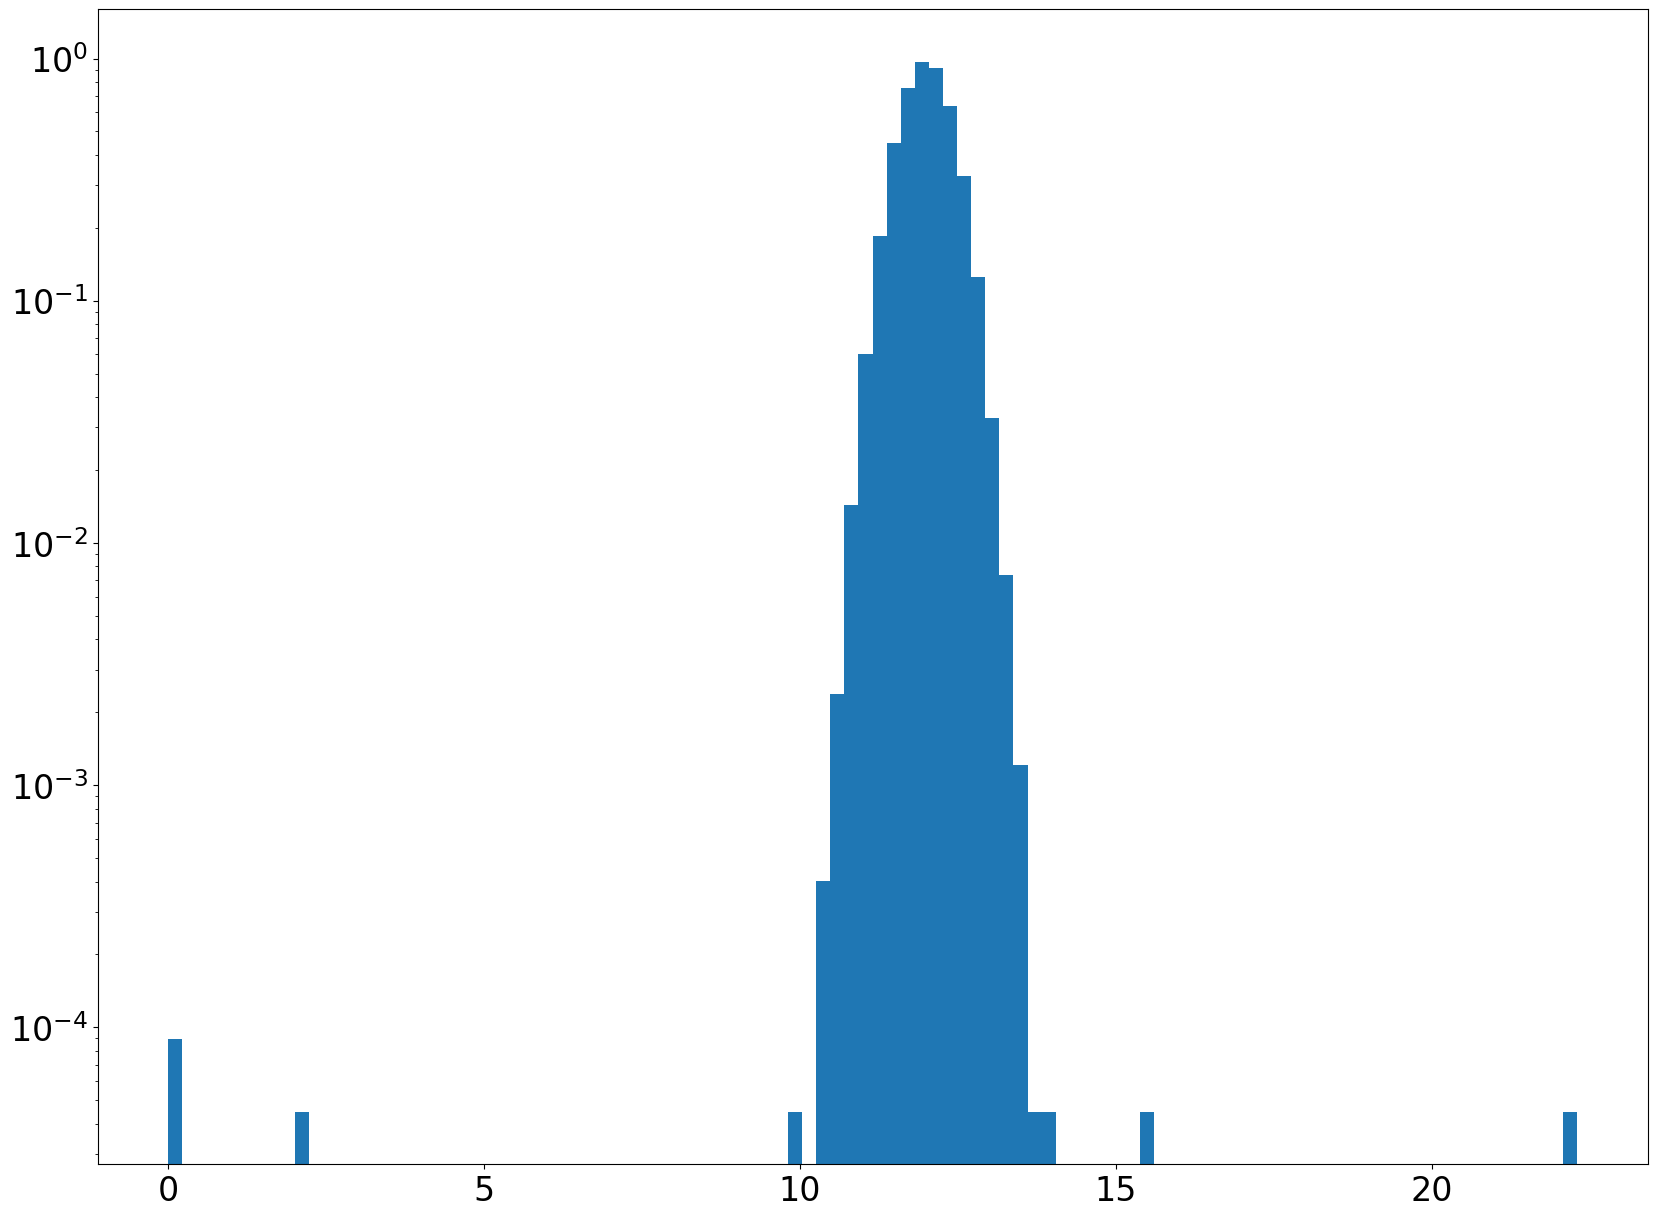

In [27]:
data_old = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(data_old, 100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

#### 2. State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.

So since we our trying to get rid of the "bad" datapoints, our statistical question would be:

So if the thermometry and thermal control system are working properly, then we should get a temperature reading of around 12K up to a 0.4 degree precision or standard deviation. So what is the probability of the thermometry and thermal control system producing a temperature reading $(t)$,  $t < 11.6$ or $t > 12.4$? If our probability exceeds a sigma value of 5$\sigma$ then we discard the temperature readings $t<11.6$ and $t>12.4$.

#### 3. Restate your question in math. Be very clear.

Probability of bad signal = $\int_ {-\infty}^{11.6} pdf(x) dx + \int_{12.4}^{\infty} pdf(x) dx$

#### 4. Apply your statistical test and construct a truth table.


In [28]:
outliers = np.array([10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
cutoff_high = outliers > 12.4
cutoff_low = outliers < 11.6 

outliers_high = outliers[cutoff_high]
outliers_low = outliers[cutoff_low]

outliers_high, outliers_low

(array([15.6, 22.3, 12.7]), array([10. , 10.3,  2.1,  0. ,  0. ]))

In [32]:
P_high = []
P_low = []

mean = np.mean(data_old)
std = np.std(data_old)

for num in outliers_high:
    prob = stats.norm.sf(num, mean, std)
    P_high.append(prob)
    
for num in outliers_low:
    prob = stats.norm.cdf(num, mean, std)
    P_low.append(prob)

In [33]:
sigma_high = []
sigma_low = []

for num in P_high:
    sigma = -stats.norm.ppf(num)
    sigma_high.append(sigma)
    
for num in P_low:
    sigma = -stats.norm.ppf(num)
    sigma_low.append(sigma)

In [34]:
sigma_high, sigma_low

([8.85526750739759, 25.327605251205217, 1.725449677988321],
 [4.912656576978926,
  4.175089215315898,
  24.335263767438658,
  29.49823529907985,
  29.49823529907985])

For the outliers/temperature readings that exceed 5$\sigma$ we discard.

In [46]:
data_new = data_old[data_old > 2.1]
data_new = data_new[data_new < 15.6]

test = len(data_new)
test_bad = len(data_old) - len(data_new)

true = 100000
true_bad = len(outliers)

test, test_bad, true, true_bad

(100003, 5, 100000, 8)

|| True Temperature | Bad Temperature  |
| ------- | --------- | ----------- |
| Test Temperature | 100003 | 8 |
| Test Bad Temperature | 5 | 100000 |

### B) How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

The number of omissions depends on our statistical threshold because we calculate the probability and sigma of possible "bad" temperatures. Since "bad" temperatures are tecnically random, I don't think that the number of omissions are predictable.

### C) Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Yes there most likely is mistakes of bad data getting in. It is avoidable however it just depends on how strict we set our statistical threshold. The bad data getting in depends on how statistically significant the bad data is due to our threshold.

## Problem 2

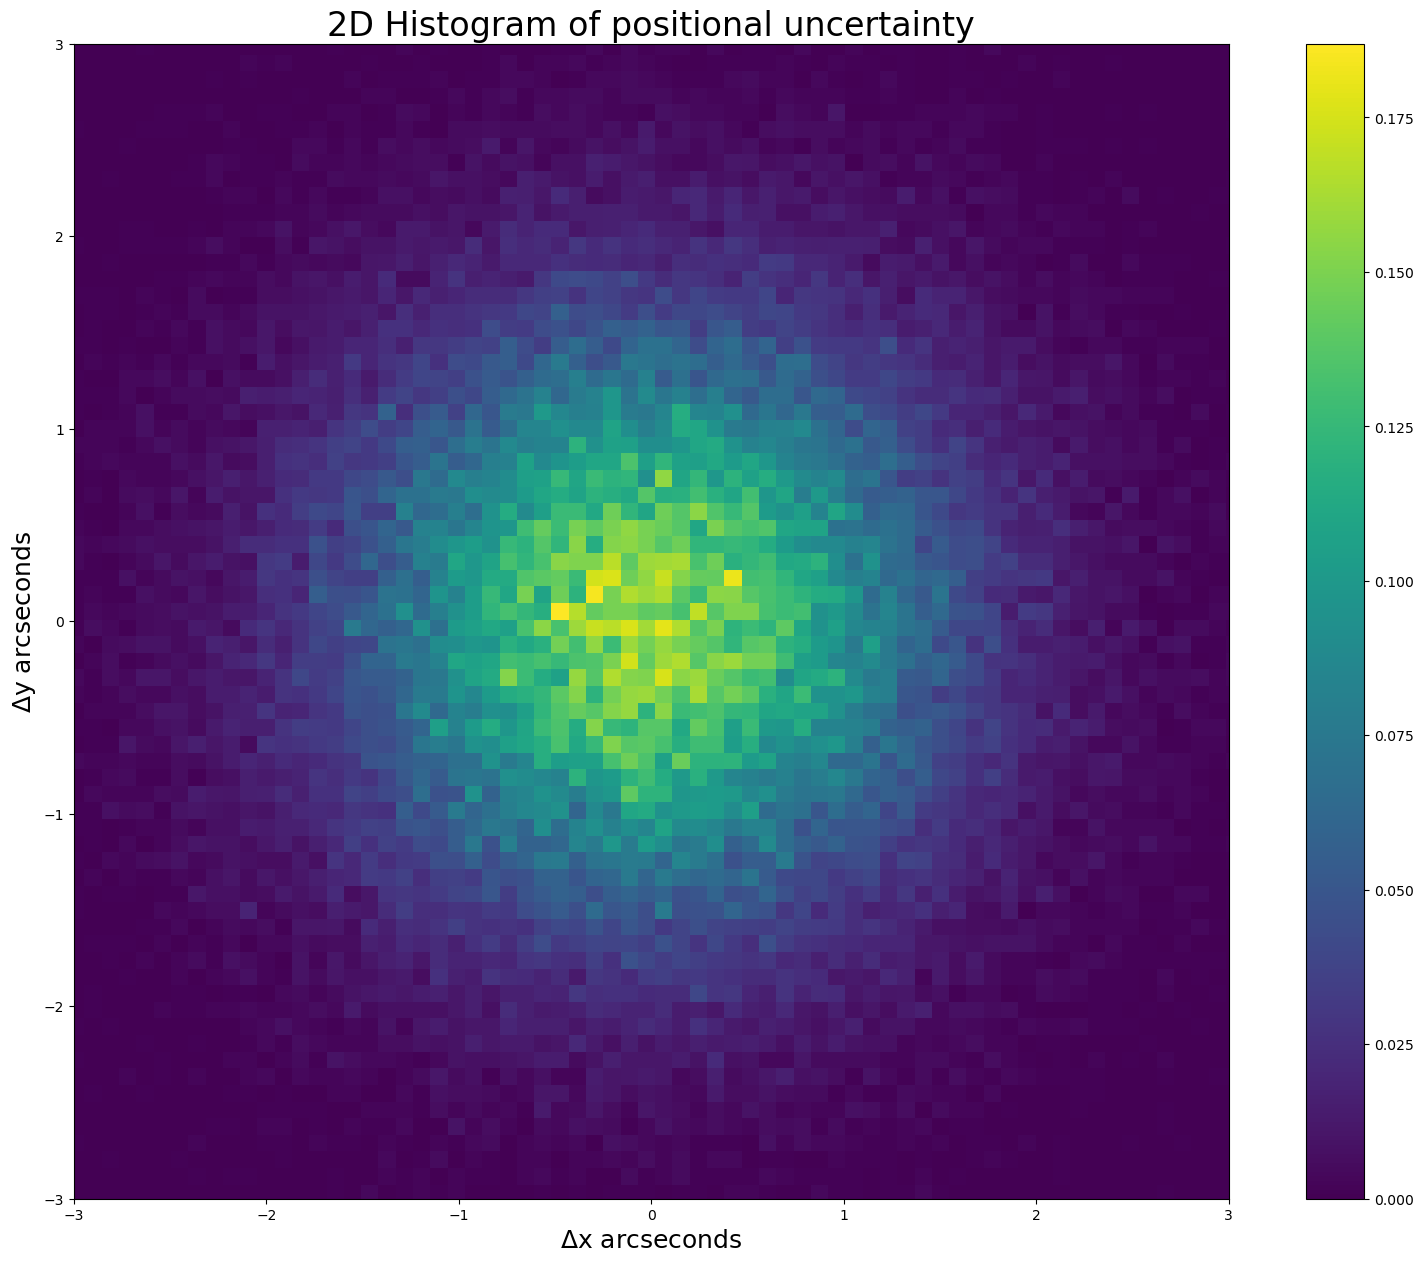

In [73]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

#### If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

#### 1. What is the question in words?

What is the probability that the above distribution showing the motion of stars in the sky due to atmospheric and instrumental effects will produce a value of velocity that corresponds to a 5$\sigma$ measurement of greater?

#### What is the question in math?

So since our distribution is in 2-dimensions, the Rayleigh is distributed $R={\sqrt {X^{2}+Y^{2}}}$, where $X\sim N(0,\sigma ^{2})$ and $Y\sim N(0,\sigma ^{2})$

We can find what distance value (corresponds to movement) produced by a Rayleigh Distribution will correspond with a 5$\sigma$ measurement

So: 
$\int_{\infty}^{a} {\frac {x}{\sigma ^{2}}}e^{-x^{2}/(2\sigma ^{2})}= 3.0 \times 10^{-7}$

#### What distance in arcseconds represents a 5 sigma detection of motion?

In [50]:
data_rayleigh = np.arange(0, 10, 0.1)
rayleigh_pdf = stats.rayleigh.pdf(data_rayleigh, scale=1)

In [54]:
five_sig = 3E-7
distance = stats.rayleigh.isf(five_sig, loc=0, scale=1)
distance

5.480781579718391

## Problem 3

As we discussed in class, one of the key backgrounds for gamma-ray telescopes are cosmic rays. Cosmic rays are charged particles—usually protons or electrons but can include atomic nuclei such a alpha particles (helium) or iron. Because of their charge cosmic rays spiral in the magnetic field of the galaxy. From the perspective of the Earth they appear to be coming uniformly from all directions like a high energy gas, and the direction the cosmic ray is travelling when it reaches the Earth tells us nothing about where it came from because we don't know what tortured path it has taken through the galaxy to reach us. However, at trillion electron volt energies and above, the spiral loops are fairly big and the sun and the moon will block cosmic rays. This means the sun and the moon appear as holes in the cosmic ray sky (cosmic rays from that direction are absorbed).

Assume in a moon sized patch on the sky we normally have a cosmic ray rate of 1 cosmic ray per minute (arrivals are random in time). If we can observe where the moon is for 8 hours per night (not too close to the horizon) and we observe for 15 days and see 6800 cosmic rays, what is the signficance of our moon shadow detection?

#### 1. What is the question in words?

In [55]:
min_in_8_hours = 60 * 8
cosmic_ray = 15 * min_in_8_hours
cosmic_ray

7200

So for a moon sized path on the sky where the cosmic ray rate is 1 ray/min , where we observe the moon for 8 hours per night and for 15 days we will see 7200 cosmic rays.

So our question would be: Given a distribution with a cosmic ray background producing 7200 cosmic ray, what is the probability that we will produce a value of 6800 cosmic rays or less?

#### 2. Translate the question to math, describing both the expected background pdf() and the integral you need to do.

Probability = $\int_ {-\infty}^{6800} pdf(x) dx$

In [59]:
mean = 7200
std = np.sqrt(mean)

In [62]:
prob_less_6800 = stats.norm.cdf(6800, loc=mean, scale=std)
prob_less_6800

1.2142337364879197e-06

#### 3. Convert to sigma.

In [63]:
sig_less_6800 = stats.norm.ppf(prob_less_6800, loc=mean, scale=std)
sig_less_6800

6800.0